<hr style="height:2px; width:100%">

<h1 style="color:#32611D">Task P3: SIG 734 Data Wrangling - Working with numpy Matrices (Multidimensional Data)</h1>

<p style="color:#551D61; font-size:16px";>
    Name: &emsp;&emsp;&emsp; Suraj Mathew Thomas<br>
    Student ID: &ensp; S223509398<br>
    Email ID: &emsp;&ensp;&ensp; s223509398@deakin.edu.au<br><br>
</p>

<hr style="height:2px; width:100%">


<h2 style="color:#336699"> Introduction</h2>

* Packages that can be used scipy and numpy
* Packages that cannot be used pandas

<p style="color:#20568B; font-size:15px";>
This task is about using the numpy and scipy library and performing plotting, distribution analysis, descriptive analysis and correlation analysis on the given multi-dimensional dataset. The dataset is the body measurements of adult male and female subjects from the National Health and Nutrition Examination Survey. The dataset is downloaded from the github repository of Prof. Dr. Marek Gagolewski. wget was used to download these csv file and genfromtxt function from the numpy library was used to to read the data from these files into arrays. We now use the data to perform statistical analysis, distribution, multivriate analysis and correlations.</p>

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 1: Importing the necessary libraries</h2>

In [287]:
#Importing the necessary libraries. We are supposed to perform the entire analysis using only numpy and scipy
#Pandas is not to be used
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr

<p style="color:#20568B; font-size:15px";>
Import the nescessary libraries that are required to perform this tasl. We are not supposed to use the pandas library. We are limited to the use of only the nupmy library for data manipulation, numerical and statistcal calculation. We are also importing the scipy library for statistical calculations. Matplot lib is then invoked for data visualization.</p>

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 2: Download the Source Files from the Given Path in GitHub</h2>

In [36]:
pip install wget #Installing the wget library which will help us download the file from an external link on the internet

Note: you may need to restart the kernel to use updated packages.


In [40]:
#Downloading the source files using the wget library by pointing to the URL of the source files
!wget https://github.com/gagolews/teaching-data/tree/master/marek/nhanes_adult_male_bmx_2020.csv
!wget https://github.com/gagolews/teaching-data/tree/master/marek/nhanes_adult_female_bmx_2020.csv

--2024-01-05 22:17:17--  https://github.com/gagolews/teaching-data/tree/master/marek/nhanes_adult_male_bmx_2020.csv
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/gagolews/teaching-data/blob/master/marek/nhanes_adult_male_bmx_2020.csv [following]
--2024-01-05 22:17:17--  https://github.com/gagolews/teaching-data/blob/master/marek/nhanes_adult_male_bmx_2020.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 177527 (173K) [text/plain]
Saving to: ‘nhanes_adult_male_bmx_2020.csv’

nhanes_adult_male_b 100%[===================>] 173.37K  1.06MB/s    in 0.2s    

2024-01-05 22:17:18 (1.06 MB/s) - ‘nhanes_adult_male_bmx_2020.csv’ saved [177527/177527]

--2024-01-05 22:17:18--  https://github.com/gagolews/teaching-data/tree/master/marek/nhanes_adult_female_bmx_2020.csv
Resolving 

In [2]:
#Reading the downloaded files data into two arrays [male, female]
male = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", delimiter=",",comments='#', skip_header = 19)
female = np.genfromtxt("nhanes_adult_female_bmx_2020.csv", delimiter=",",comments='#', skip_header = 19)

In [3]:
male #Verifying if the data is read properly into the array

array([[ 98.8, 182.3,  42. , ...,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1, ...,  30.2,  94.5,  86.8],
       [103.7, 185.3,  47. , ...,  32. , 107.8, 109.6],
       ...,
       [108.8, 168.7,  38.6, ...,  33.6, 118. , 114.7],
       [ 79.5, 176.4,  39.5, ...,  31.4,  99.8,  97.1],
       [ 59.7, 167.5,  40.3, ...,  29.2,  90.5,  86.9]])

In [4]:
female ##Verifying if the data is read properly into the array

array([[ 97.1, 160.2,  34.7, ...,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5, ...,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4, ...,  31.8, 106.2,  92. ],
       ...,
       [ 73. , 159.6,  36.2, ...,  31.4, 104.6,  99.3],
       [ 78.6, 168.5,  38.1, ...,  36. , 102.4,  98.5],
       [ 82.8, 147.8,  34.8, ...,  39.5, 121.4, 110. ]])

<p style="color:#20568B; font-size:15px";>
We install the wget package to download the relevant files from a given URL into the Jupyter notebook hosted drive. From there we read the file using the numpy library's genfromtxt function. After that we validate if the file has been loaded correctly by displaying the array variable into which it is loaded.</p>

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 3: Adding a new column to the male dataset and female data set to store the calculated BMI</h2>

In [5]:
# Add a new column to the female matrix for body mass index
bmi = female[:,0] / ((female[:,1]/100)**2) #BMI formula
female = np.column_stack((female, bmi)) #Adding a new column into the exisiting female array to reflect the calcualted BMI

# Add a new column to the male matrix for body mass index
bmi = male[:,0] / ((male[:,1]/100)**2) #BMI formula
male = np.column_stack((male, bmi))#Adding a new column into the exisiting male array to reflect the calcualted BMI

<p style="color:#20568B; font-size:15px";>
We use the column manipulation of the array to use in the formulation of the BMI formula and then use to the column_stack function of numpy to add the calculated BMIs in a column.</p>

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 4: Drawing a histogram. Single plot - Two Histograms plotting female BMIs and male BMIs to visualize the distribution</h2>

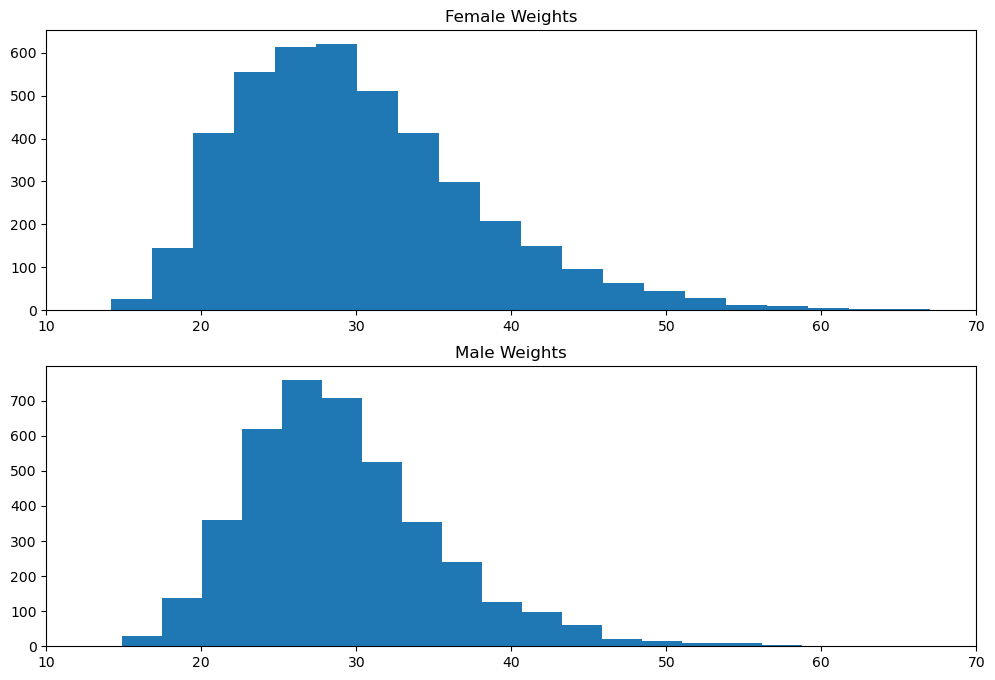

In [6]:
# Plot histograms of male and female weights on a single plot

plt.figure(figsize=(12,8)) #Setting the plot size

plt.subplot(2,1,1) #First subplot (2 rows, 1 column, 1st figure)
plt.hist(female[:,7], bins=20) #Setting the bins of the histogram to 20
plt.title("Female Weights") #Setting the title of the plot
plt.xlim(10,70) #x-scale identical for both histograms

plt.subplot(2,1,2) #Second subplot (2 rows, 1 column, 2nd figure)
plt.hist(male[:,7], bins=20) #Setting the bins of the histogram to 20
plt.title("Male Weights") #Setting the title of the plot
plt.xlim(10,70) #x-scale identical for both histograms

plt.show() #Displaying the plot

<p style="color:#20568B; font-size:15px";>
Next the histograms are plotted in a single plot using the subplot function to specify the position on the grid where the graph needs to be displayed. The limits of the x-axis are specified using the xlim function. The histograms are plotted using the hist function and the number of bins to create the histogram are passed as an argument inside the hist function.</p>

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 5: Drawing a boxplot. Single Plot - Two Boxplots plotting female BMIs and male BMIs to visualize the distribution</h2>

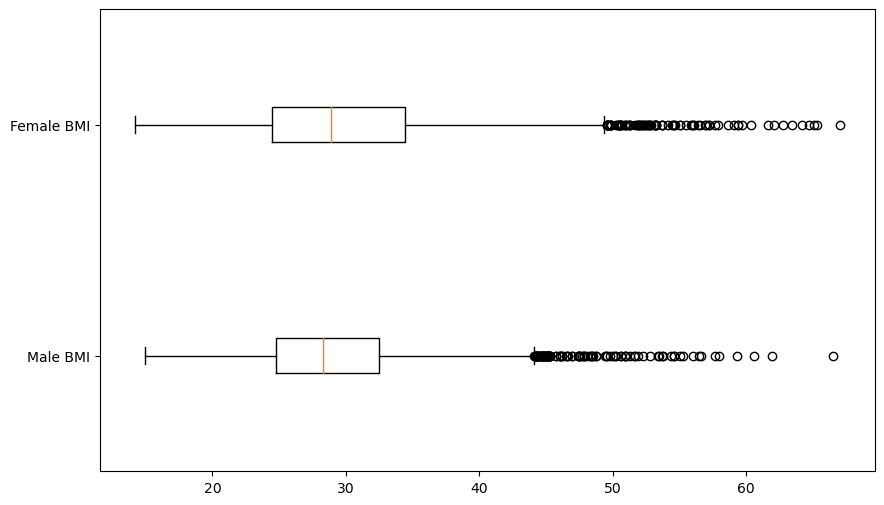

In [7]:
plt.figure(figsize=(10,6)) #Setting the plot size
plt.boxplot([male[:,7], female[:,7]], labels=["Male BMI", "Female BMI"], vert = False) #Boxplot of the BMIs of male and female. The vert is set to false for a horizontal orientation
plt.show()

<p style="color:#20568B; font-size:15px";>
Next the box plot is drawn to visualize the distribution of the male and female bmis calculated and also the outliers and the median value.</p>

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 6: Basic Numerical Aggregation of the male and female BMIs</h2>

In [8]:
female_bmi = female[:,7] #Extracting only the BMI column from the female array
male_bmi = male[:,7] #Extracting only the BMI column from the male array

In [161]:
#Calculating the Descriptive Stats of the column BMI from the female dataset
female_mean = round(np.mean(female_bmi),2) #mean
female_median = round(np.median(female_bmi),2) #median
female_min_value = round(np.min(female_bmi),2) #minimum value
female_max_value = round(np.max(female_bmi),2) #maximum value
female_q1 = round(np.percentile(female_bmi,25),2) #first quartile
female_q3 = round(np.percentile(female_bmi,75),2) #thrid quartile
female_std = round(np.std(female_bmi),2) #standard deviation
female_iqr = round((female_q3 - female_q1),2) #inter quartile range
female_skewness = round(stats.skew(female_bmi),2) #skewness

#Calculating the Descriptive Stats of the column BMI from the male dataset
male_mean = round(np.mean(male_bmi),2) #mean
male_median = round(np.median(male_bmi),2) #median
male_min_value = round(np.min(male_bmi),2) #minimum value
male_max_value = round(np.max(male_bmi),2) #maximum value
male_q1 = round(np.percentile(male_bmi,25),2) #first quartile
male_q3 = round(np.percentile(male_bmi,75),2) #thrid quartile
male_std = round(np.std(male_bmi),2) #standard deviation
male_iqr = round((male_q3 - male_q1),2) #inter quartile range
male_skewness = round(stats.skew(male_bmi),2) #skewness

In [162]:
data = {'Female-BMI': [female_mean, female_median, female_min_value, female_max_value,female_std,female_iqr,female_skewness],
        'Male-BMI': [male_mean, male_median, male_min_value, male_max_value,male_std,male_iqr,male_skewness]}

In [163]:
data['Female-BMI'],data['Male-BMI']

([30.1, 28.89, 14.2, 67.04, 7.76, 10.01, 0.92],
 [29.14, 28.27, 14.91, 66.5, 6.31, 7.73, 0.97])

In [195]:
#Displaying the stats in a table like format without the use of pandas
#Formatting is the done based on the variying spaces
print("###" " " "BMI","  ","Female","  ","Male")
print("###" " " "Mean","  ",female_mean,"  ",male_mean)
print("###" " " "Median","",female_median," ",male_median)
print("###" " " "Min","   ",female_min_value,"  ",male_min_value)
print("###" " " "Max","   ",female_max_value," ",male_max_value)
print("###" " " "Std","    ",female_std,"  ",male_std)
print("###" " " "IQR","   ",female_iqr,"  ",male_iqr)
print("###" " " "Skew","   ",female_skewness,"  ",male_skewness)

### BMI    Female    Male
### Mean    30.1    29.14
### Median  28.89   28.27
### Min     14.2    14.91
### Max     67.04   66.5
### Std      7.76    6.31
### IQR     10.01    7.73
### Skew     0.92    0.97


<p style="color:#20568B; font-size:15px";>
Next, the statistics around the male and female BMIs like the mean, median, min, max, std. dev etc, are calculated and displayed in a table like format.</p>

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 7: Interpretation of the distribution</h2>

<h3 style="color:#336699"> We can see that </h3>

<p style="color:#20568B; font-size:15px";>
We have seen above how the numpy library can be used to perform descriptive statistics on the bitcoin to usd dataset. This dataset can also be treated as a timeseries dataset. We have learnt how to </p>

<p style="color:#20568B; font-size:16px" >
    <ul style="color:#20568B; font-size:16px";>
        <li> The mean and median of the BMI for females are slightly higher than that of males.</li>
        <li>The standard deviation from the mean is slightly higher for females when compared to the males. This means that for the female BMI the values are a little farer from the mean when compared to the male BMI.</li>
        <li>We can seek in both cases for male and female, the BMI data is positively skewed (between 0.5 to 1).In other words, the BMI is not evenly distributed.</li>
        <li>Skewness tells us the direction of outliers. Here the tail of the distribution curve for BMI is longer on the right side.</li>
        <li>The box-plot also reveals the same [The outliers are concentrated more on the right side].</li>
        <li>IQR tells us the spread in the middle half (the middle 50%) of the BMI data.</li>
        <li>The IQR for BMI female is greater than the IQR for BMI male. This tells us that the central portion for BMI female is spread out further and has higher variablity.</li>
        <li>The Male BMIs are little more close clustered than the female BMIs (which have more variablity).</li>
    </ul>
</p>


In [13]:
male.shape

(4081, 8)

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 8: Scatter plot matrix (pairplot) - Custom package </h2>

In [284]:
#Custom pairplot function from Minimilist Data Wrangling with Python - Open Text Book
def pairplot(X, labels, bins=21, alpha=0.1): #definition of the function with arguments
    """
    Draws a scatter plot matrix, given:
    * X - data matrix,
    * labels - list of column names
    """
    assert X.shape[1] == len(labels) #checking if the coloum labels and the obervations match

    #Iterating and creating the pairplot between the variables
    k = X.shape[1]
    fig, axes = plt.subplots(nrows=k, ncols=k, sharex="col", sharey="row",
        figsize=(plt.rcParams["figure.figsize"][0], )*2)
    for i in range(k):
        for j in range(k):
            ax = axes[i, j]
            if i == j:  # diagonal
                ax.text(0.5, 0.5, labels[i], transform=ax.transAxes,
                    ha="center", va="center", size="small")
            else:
                ax.plot(X[:, j], X[:, i], ".", color="orange", alpha=alpha)

In [285]:
#Defining the column labels in an array in the same order of the observations
body_param_columns = np.array([
    "weight (kg)",
    "height (cm)",  
    "upper arm len. (cm)",
    "upper leg len. (cm)",
    "arm (cm)",
    "hip (cm)",
    "waist (cm)",
    "BMI"
])

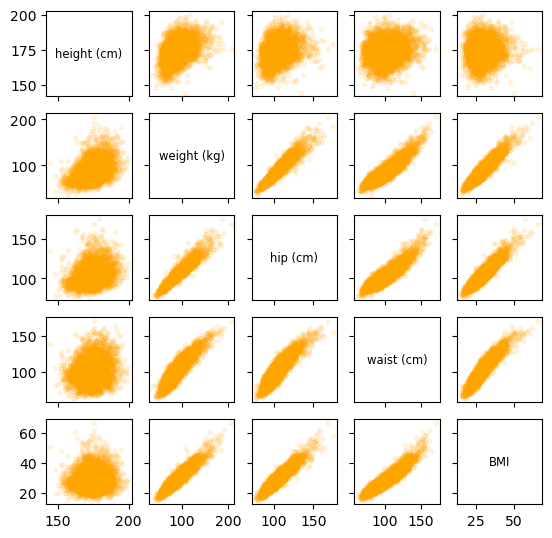

In [286]:
#Calling the custom pariplot function
selected_columns = [1, 0, 5, 6, 7] #Defining the order of the variables in the pairplot formation 
pairplot(male[:, selected_columns], body_param_columns[selected_columns]) #Calling the function by passing the input parameters
plt.show() #Displaying the plot

<p style="color:#20568B; font-size:15px";>
Next we define a custom function called pairplot. This custom function is taken from the Minimilast Data Wrangling with Python (v1.0.3.9011), Marek Gagolewski, digital book. This function takes in the selected column and the labels as inputs, compares it and then iterates through each column in the selected dataframe and construct the pairplot between each of the variables. Here the selected columns where the pairplots needs to be visualized between them are height, weight, hip, waist and BMI</p>

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 9: Pearson and Spearman Correlation </h2>

In [282]:
#Custom correlation heatmap generation function from Minimilist Data Wrangling with Python - Open Text Book
def corrheatmap(R, labels): #definition of the function with arguments
    """
    Draws a correlation heat map, given:
    * R - matrix of correlation coefficients for all variable pairs,
    * labels - list of column names
    """
    assert R.shape[0] == R.shape[1] and R.shape[0] == len(labels)
    k = R.shape[0]

    # plot the heat map using a custom colour palette
    # (correlations are in [-1, 1])
    plt.imshow(R, cmap=plt.colormaps.get_cmap("PiYG"), vmin=-1, vmax=1)

    # add text labels
    for i in range(k):
        for j in range(k):
            plt.text(i, j, f"{R[i, j]:.2f}", ha="center", va="center",
                color="black" if np.abs(R[i, j])<0.5 else "white")

    plt.xticks(np.arange(k), labels=labels, rotation=30)
    plt.tick_params(axis="x", which="both",
        labelbottom=True, labeltop=True, bottom=False, top=False)

    plt.yticks(np.arange(k), labels=labels)
    plt.tick_params(axis="y", which="both",
        labelleft=True, labelright=True, left=False, right=False)

    plt.grid(False)

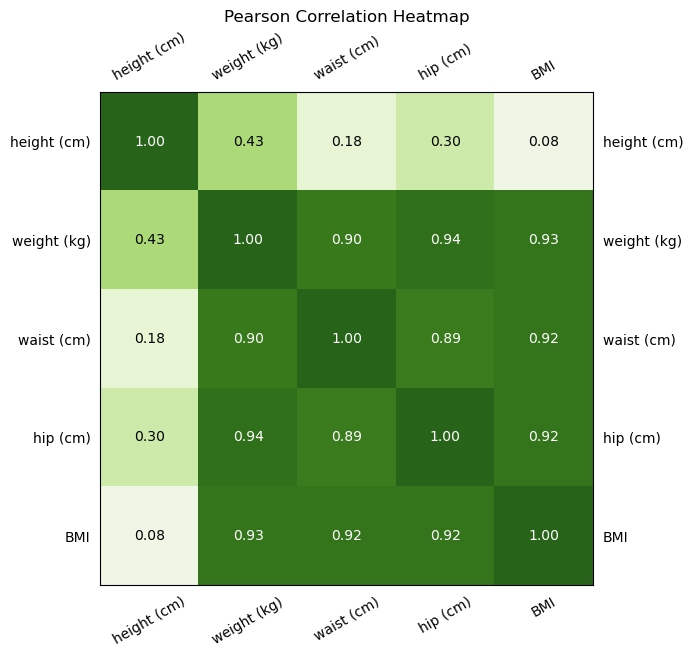

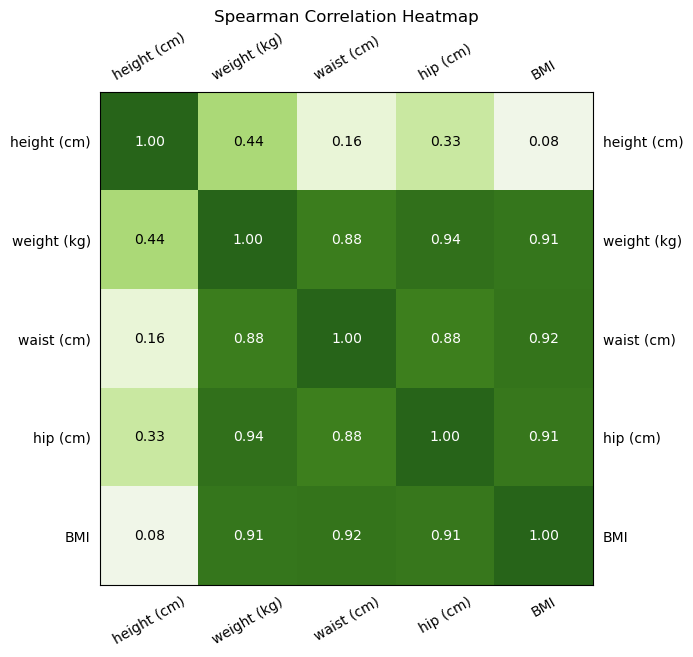

In [283]:
#Calling the function and plotting the correlation heatmap
#plt.figure(figsize=(8,5))
#plt.subplot(1,2,1)
plt.figure(figsize=(plt.rcParams["figure.figsize"][0], )*2)  # width=height
R = np.corrcoef(male, rowvar=False)
order = [1,0,6,5,7]
corrheatmap(R[np.ix_(order, order)], body_param_columns[order])
plt.title("Pearson Correlation Heatmap")
plt.show()

#plt.figure(figsize=(8,5))
#plt.subplot(1,2,2)
plt.figure(figsize=(plt.rcParams["figure.figsize"][0], )*2)  # width=height
S = stats.spearmanr(male)
order = [1,0,6,5,7]
corrheatmap(S[0][np.ix_(order, order)], body_param_columns[order])
plt.title("Spearman Correlation Heatmap")
plt.show()

<p style="color:#20568B; font-size:15px";>
Next we define a custom function called pairplot. This custom function is taken from the Minimilast Data Wrangling with Python (v1.0.3.9011), Marek Gagolewski, digital book. This function takes in the selected column and the labels as inputs, compares it and then iterates through each column in the selected dataframe and construct the pairplot between each of the variables. Here the selected columns where the pairplots needs to be visualized between them are height, weight, hip, waist and BMI</p>

<h style="height:1px; width:100%">

<h2 style="color:#1D3361"> Step 10: Findings of the pariplot and the correlation heatmap </h2>

<h3 style="color:#336699"> We can infer that </h3>

<p style="color:#20568B; font-size:16px" >
    <ul style="color:#20568B; font-size:16px";>
        <li> From the pair plot there is a linear replationship between weight, hip size, waist size and bmi.</li>
        <li> The plots for these show a linear increasing cluster of points..</li>
        <li>From the pearson and spearman corrlation heatmap we can see a very strong positive correlation between weight, hip size, waist size and bmi, whereas there is a moderate positive relation between height of a person and weight of a person</li>
        <li>There is a weak positive correlation between height, hip size, waist size and bmi.</li>
        <li>Weight of a person is the predomionant driver.</li>
    </ul>
</p>


<h3 style="color:#336699"> Conclusion </h3>

<p style="color:#20568B; font-size:15px";>
We have seen above how the numpy library can be used to read the csv file into an array, calculate the BMI and join the calculated BMI as a seperate field in the array, visualize the distribution, analyse the correlation of multidimensional array.  We have learnt how to </p>

<p style="color:#20568B; font-size:16px" >
    <ul style="color:#20568B; font-size:16px";>
        <li> Read the data using the numpy library without using the pandas library.</li>
        <li> Create a new field (BMI) to the existing data.</li>
        <li> Calculate descriptive stats.</li>
        <li> Visualize the histogram and boxplots in a single plot using the subplot function.</li>
        <li> Learn and use the custom pairplot and custom correlation heatmap functions.</li>
        <li> Use numpy and scipystats to calculate the correlation.</li>
    </ul>
</p>


**References**

* Minimilast Data Wrangling with Python (v1.0.3.9011), Marek Gagolewski, Multidimensional numeric data at a glance, https://datawranglingpy.gagolewski.com/chapter/310-matrix.htmll, accessed 10th January 2024.
* Minimilast Data Wrangling with Python (v1.0.3.9011), Marek Gagolewski, Exploring relationships between variables, https://datawranglingpy.gagolewski.com/chapter/330-relationship.html, accessed 10th January 2024.
